In [5]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, root_mean_squared_error,classification_report
from sklearn.datasets import load_breast_cancer,load_diabetes
import matplotlib.pyplot as plt

#### Regression Tree Model

In [2]:
# load the sample datasets
X = load_diabetes(as_frame=True)['data']
y = load_diabetes()['target']

#split the dataset
def split_data(X:pd.DataFrame, y:np.array, stratify = None) -> tuple:
    if stratify is None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=23)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=23, stratify=stratify)
            
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

In [16]:
# train the model
model = DecisionTreeRegressor(max_depth=2, criterion='squared_error')
model.fit(X_train, y_train)
train_preds = model.predict(X_train) # getting train prediction
test_preds = model.predict(X_test) # getting test prediction

# evaluation
test_rmse = root_mean_squared_error(y_test, test_preds)
train_rmse = root_mean_squared_error(y_train, train_preds)

print(f'train_rmse: {train_rmse}')
print(f'test_rmse: {test_rmse}')

train_rmse: 57.16152454103597
test_rmse: 61.4703381370378


Text(0.5, 1.0, 'Decision Tree Visual')

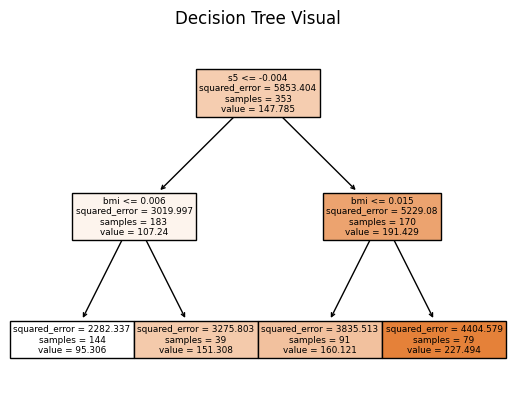

In [17]:
plot_tree(model,class_names=['No Cancer','Cancer'],
          feature_names=list(X_train.columns),filled=True,
          max_depth=2)
plt.title('Decision Tree Visual')

In [13]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
13,0.005383,0.050680,-0.001895,0.008101,-0.004321,-0.015719,-0.002903,-0.002592,0.038394,-0.013504
325,-0.001882,-0.044642,0.054152,-0.066506,0.072732,0.056619,-0.043401,0.084863,0.084492,0.048628
319,0.019913,-0.044642,0.004572,0.045972,-0.018080,-0.054549,0.063367,-0.039493,0.028658,0.061054
148,-0.060003,0.050680,0.015350,-0.019442,0.036958,0.048164,0.019187,-0.002592,-0.030748,-0.001078
...,...,...,...,...,...,...,...,...,...,...
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
40,0.005383,0.050680,-0.008362,0.021872,0.054845,0.073215,-0.024993,0.034309,0.012551,0.094191
230,-0.038207,0.050680,0.071397,-0.057313,0.153914,0.155887,0.000779,0.071948,0.050281,0.069338


### Decision Trees Classifier

In [20]:
X = load_breast_cancer(as_frame=True)['data']
y = load_breast_cancer()['target']

X_train, X_test, y_train, y_test = split_data(X, y, stratify=y)

In [37]:
# model training
model = DecisionTreeClassifier(max_depth=6, random_state=23,
                               criterion='entropy', min_samples_split=5) # init the model
model.fit(X_train, y_train) # fit the data to the model
train_preds = model.predict(X_train) # get train prediction
test_preds = model.predict(X_test) # get test prediction

# evaluate model performance
test_score = f1_score(y_test, test_preds)
train_score = f1_score(y_train, train_preds)

print(f'Train F1 score: {train_score}')
print(f'Test F1 score: {test_score}')

Train F1 score: 0.9982425307557118
Test F1 score: 0.9370629370629371


In [38]:
print('===========Test Report ====================')
print(classification_report(y_test, test_preds))
print('===========Train Report ====================')
print(classification_report(y_train, train_preds))

===========Test Report ====================
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

===========Train Report ====================
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



### Assignment

Write a very good article on the following concepts in decision tree
1. Entropy
2. Gini
3. Information Gain
4. Overfitting in Tree algorithms

Note: article should be atleast 100 words and at most 150.